
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Oct 14, 2019)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

In [1]:
import math
import io
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import scipy.stats
import scipy.optimize
import scipy.spatial

poll = pd.read_csv('poll-larger.csv')
poll.info()



poll['vote'].value_counts(normalize=True) 

def sample(orgeronWinPercent,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < orgeronWinPercent,'Orgeron','Saban')})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
vote    10000 non-null object
dtypes: object(1)
memory usage: 78.2+ KB


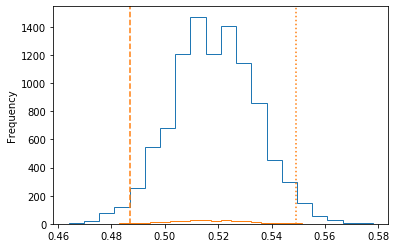

In [2]:
distDF = pd.DataFrame([sample(0.518)['vote'].value_counts(normalize=True) for i in range(10000)])

distDF.head()

distDF['Orgeron'].plot(kind='hist',histtype='step',bins=20)

distDF['Orgeron'].plot(kind='hist',histtype='step',bins=30, density=True)
plt.axvline(distDF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
#plt.axvline(distDF['Saban'].quantile(0.500), c='C1')
plt.axvline(distDF['Orgeron'].quantile(0.975), c='C1',linestyle=':')



In [3]:
#confidence interval:[.48,.55]
#point estimate: .515
#MOE:+-.035